# This is a notebook for inference on the plantnet models

In [4]:
from utils import load_model
from torchvision.models import resnet18, resnet152

# Change this line with your downloaded model
filename = '/Users/francescocenciarelli/Downloads/resnet152_weights_best_acc.tar' # pre-trained model path
use_gpu = True  # load weights on the gpu
model = resnet152(num_classes=1081) # 1081 classes in Pl@ntNet-300K, change the net here

load_model(model, filename=filename, use_gpu=False)

# Just printing the first layer
print(model.layer1)

/Users/francescocenciarelli/miniconda3/envs/ml/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Sequential(
  (0): Bottleneck(
    (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
    (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
    (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
    (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (relu): ReLU(inplace=True)
    (downsample): Sequential(
      (0): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (1): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
  )
  (1): Bottleneck(
    (conv1): Conv2d(256, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
    (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (conv2): Conv2d(64, 64, ke

## Prepare the data, eval, and print model outlook

torch.Size([1, 3, 224, 224])
The size of hte output is:  (330, 1)


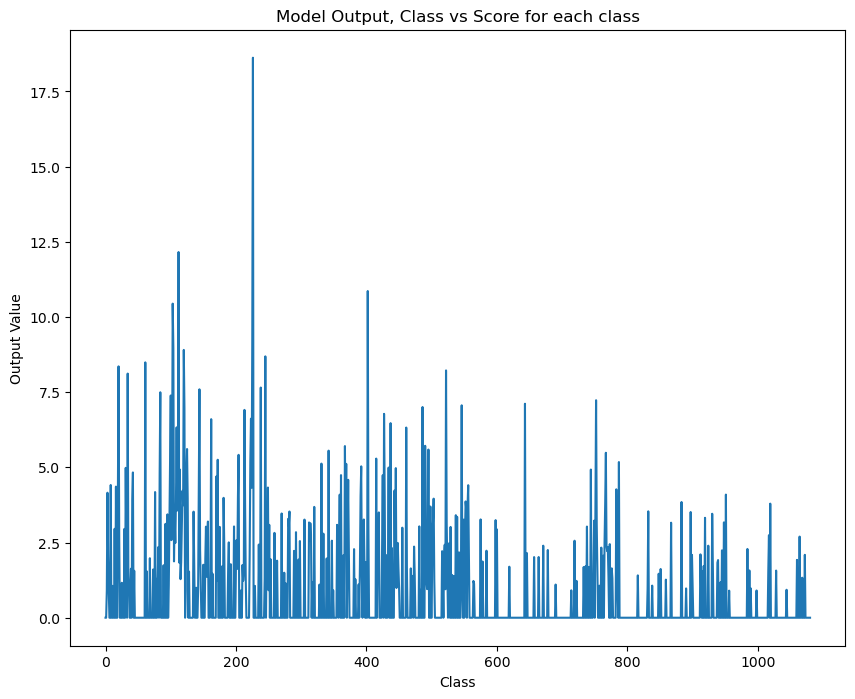

In [29]:
from PIL import Image
import numpy as np
import torch
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import seaborn as sns

# Define the image path and model
image_path = './testing_images/images.jpeg'  # Replace with your image path
model.eval()  # Ensure model is in evaluation mode

# Load and preprocess the image
image = Image.open(image_path).convert('RGB')

# Define the transformation: resize, to tensor, and normalize
transform = transforms.Compose([
    transforms.Resize((224, 224)),  # Resize image to 8x8
    transforms.ToTensor(),      # Convert PIL image to PyTorch tensor
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])  # Normalize with ImageNet stats
])

# Apply the transformation to the image
image_tensor = transform(image).unsqueeze(0)  # Add batch dimension

print(image_tensor.shape)  # Should print torch.Size([1, 3, 8, 8])

# Ensure no gradients are calculated
with torch.no_grad():
    # Pass the image through the model and get the output
    output = model(image_tensor)

# Convert the output to a numpy array for processing
output_np = output.squeeze().cpu().numpy()

# Apply threshold to the output for visualization
output_np = np.where(output_np < 0.9, 0, output_np)

output_only_np = np.array([i for i in output_np if i > 0.9]).reshape(-1, 1)

print("The size of hte output is: ", output_only_np.shape)


# Plot the output as a heatmap
plt.figure(figsize=(10, 8))
plt.plot(output_np)
    
plt.title('Model Output, Class vs Score for each class')
plt.xlabel('Class')
plt.ylabel('Output Value')
plt.show()



## Visualise the Image being inputted

torch.Size([1, 3, 224, 224])


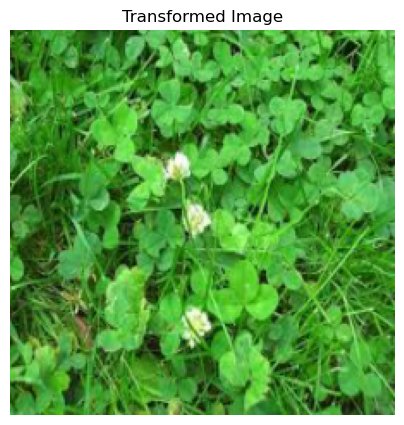

In [30]:
print(image_tensor.shape)  # Should print torch.Size([1, 3, 8, 8])

# Reverse the normalization to visualize the image
unnormalize = transforms.Normalize(
    mean=[-0.485 / 0.229, -0.456 / 0.224, -0.406 / 0.225],
    std=[1 / 0.229, 1 / 0.224, 1 / 0.225]
)

# Apply the unnormalization
image_unnormalized = unnormalize(image_tensor[0])

# Convert tensor to numpy array and transpose to (H, W, C)
image_np = image_unnormalized.permute(1, 2, 0).numpy()

# Clip values to the range [0, 1]
image_np = np.clip(image_np, 0, 1)

# Plot the image
plt.figure(figsize=(5, 5))
plt.imshow(image_np)
plt.title('Transformed Image')
plt.axis('off')
plt.show()

In [1]:
# Load the JSon files

import json

# File paths
species_codes_file = 'class_idx_to_species_id.json'
plant_names_file = 'species_id.json'

# Read the JSON files
with open(species_codes_file, 'r') as f:
    species_codes = json.load(f)

with open(plant_names_file, 'r') as f:
    plant_names = json.load(f)

# Connect the label to the plant name
label_to_plant_name = {label: plant_names[species_code] for label, species_code in species_codes.items()}


for i in output_np:
    if i > 0:
        indices = np.where(output_np == i)
        for index in indices[0]:
            if index < 10:

                print(f"Index: {index}")
                print(f"Output Value: {i}")
                print(f"Plant Name: {label_to_plant_name[str(index)]}")
            else:
                pass


NameError: name 'output_np' is not defined

['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13', '14', '15', '16', '17', '18', '19', '20', '21', '22', '23', '24', '25', '26', '27', '28', '29', '30', '31', '32', '33', '34', '35', '36', '37', '38', '39', '40', '41', '42', '43', '44', '45', '46', '47', '48', '49', '50', '51', '52', '53', '54', '55', '56', '57', '58', '59', '60', '61', '62', '63', '64', '65', '66', '67', '68', '69', '70', '71', '72', '73', '74', '75', '76', '77', '78', '79', '80', '81', '82', '83', '84', '85', '86', '87', '88', '89', '90', '91', '92', '93', '94', '95', '96', '97', '98', '99', '100', '101', '102', '103', '104', '105', '106', '107', '108', '109', '110', '111', '112', '113', '114', '115', '116', '117', '118', '119', '120', '121', '122', '123', '124', '125', '126', '127', '128', '129', '130', '131', '132', '133', '134', '135', '136', '137', '138', '139', '140', '141', '142', '143', '144', '145', '146', '147', '148', '149', '150', '151', '152', '153', '154', '155', '156', '157', '15

In [32]:
index = output_np.argmax()
print(f"The most probable Plant Name is: {label_to_plant_name[str(index)]}")

# Get the indices of the top five maximum values
top_five_indices = output_np.argsort()[-5:][::-1]

print()
# Print the indices and corresponding values
for idx in top_five_indices:
    print(f"Index: {idx}, Value: {output_np[idx]}")
    print(f"Plant Name: {label_to_plant_name[str(idx)]}")

The most probable Plant Name is: Trifolium repens L.

Index: 226, Value: 18.622495651245117
Plant Name: Trifolium repens L.
Index: 112, Value: 12.160767555236816
Plant Name: Trifolium pratense L.
Index: 402, Value: 10.863814353942871
Plant Name: Alliaria petiolata (M.Bieb.) Cavara & Grande
Index: 103, Value: 10.444507598876953
Plant Name: Trifolium hybridum L.
Index: 225, Value: 9.296731948852539
Plant Name: Trifolium nigrescens Viv.


In [33]:
genus = []
genus_ids = []

for i in range(len(label_to_plant_name)):
    label_to_plant_name[str(i)].split(" ")
    # print(label_to_plant_name[str(i)].split(" "))
    genus_found = label_to_plant_name[str(i)].split(" ")[0]
    if genus_found not in genus:
        genus.append(label_to_plant_name[str(i)].split(" ")[0])
        genus_ids.append([i])
    else:
        genus_ids[genus.index(genus_found)].append(i)
    
print(len(genus_ids))
print(len(genus))



303
303


In [34]:
from collections import Counter

# Get the indices of the top five maximum values
top_fifty_indices = output_np.argsort()[-50:][::-1]

print()
# Print the indices and corresponding values
# for idx in top_fifty_indices:
#     print(f"Index: {idx}, Value: {output_np[idx]}")
#     print(f"Plant Name: {label_to_plant_name[str(idx)]}")

print("The top 50 genus are: ")
print(top_fifty_indices)

top_fifty_genus = []
top_fifty_genus_score = []

for idx in top_fifty_indices:
    for i in range(len(genus_ids)):
        if idx in genus_ids[i]:
            top_fifty_genus.append(genus[i])
            top_fifty_genus_score.append(output_np[idx])

            
print(top_fifty_genus)
print(top_fifty_genus_score)


# Zip the species and scores together
zipped_pairs = list(zip(top_fifty_genus, top_fifty_genus_score))

# Sort the zipped pairs by species
sorted_pairs = sorted(zipped_pairs, key=lambda x: x[0])

# Unzip the sorted pairs back into two arrays
sorted_species, sorted_scores = zip(*sorted_pairs)

# Convert back to lists if needed
sorted_species = list(sorted_species)
sorted_scores = list(sorted_scores)

print("Sorted species:", sorted_species)
print("Sorted scores:", sorted_scores)

top_fifty_dict_genus = Counter(top_fifty_genus)
word_counts_dict = dict(top_fifty_dict_genus)

print(word_counts_dict)



The top 50 genus are: 
[226 112 402 103 225 104 120 245  61  20 522  34 238 144  84 100 752 643
 546 486 121 213 427 223 162 437 109 461 490 367 125 495 342 767 204 415
  99 172 787 222 331 369 392 434  31 445 114 744  42 124]
['Trifolium', 'Trifolium', 'Alliaria', 'Trifolium', 'Trifolium', 'Trifolium', 'Trifolium', 'Lapsana', 'Alliaria', 'Trifolium', 'Trifolium', 'Moehringia', 'Fragaria', 'Chaerophyllum', 'Lamium', 'Trifolium', 'Anemone', 'Asystasia', 'Trifolium', 'Anemone', 'Trifolium', 'Phalaris', 'Lamium', 'Trifolium', 'Ophrys', 'Maianthemum', 'Trifolium', 'Ophrys', 'Anemone', 'Cirsium', 'Althaea', 'Angelica', 'Aegopodium', 'Mitella', 'Daucus', 'Hypericum', 'Trifolium', 'Lamium', 'Tradescantia', 'Trifolium', 'Lactuca', 'Cirsium', 'Epipactis', 'Liriodendron', 'Humulus', 'Moehringia', 'Trifolium', 'Duchesnea', 'Lactuca', 'Althaea']
[18.622496, 12.160768, 10.863814, 10.444508, 9.296732, 8.9630785, 8.90515, 8.691125, 8.491687, 8.35874, 8.2238865, 8.118059, 7.6542997, 7.5952578, 7.4969

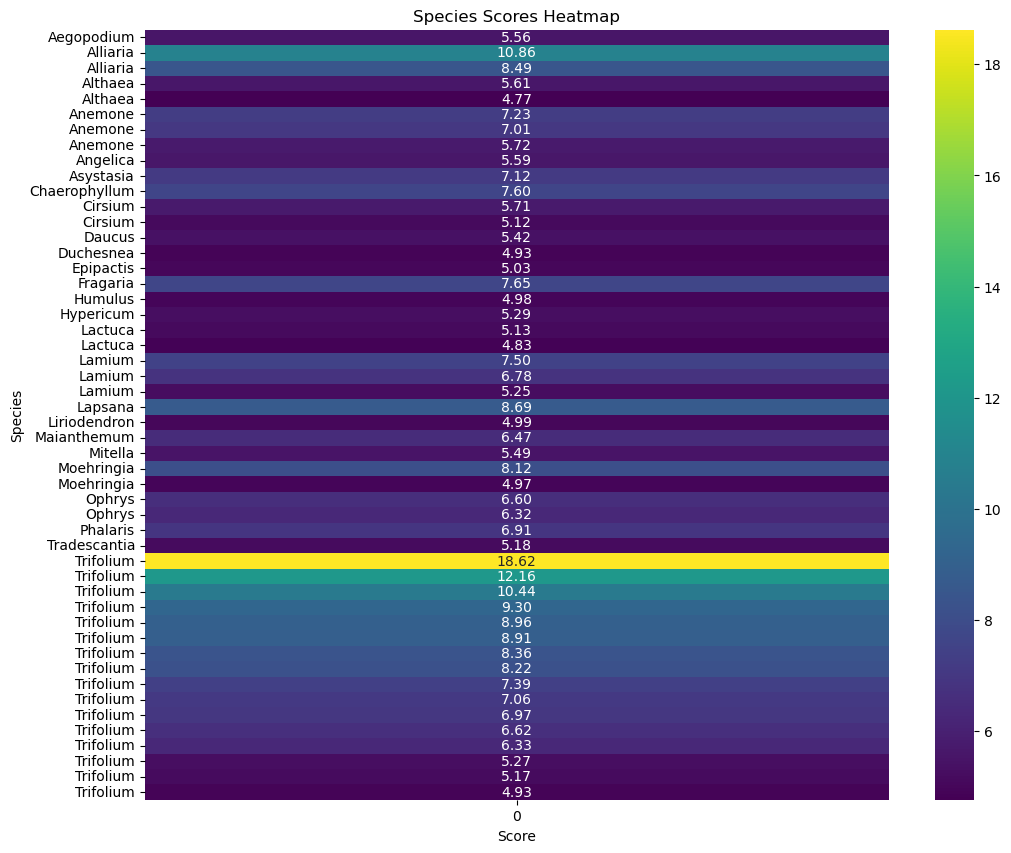

In [35]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create a heatmap-friendly 2D array from the sorted species and scores
heatmap_data = np.array(sorted_scores).reshape(-1, 1)

# Plot the heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(heatmap_data, cmap='viridis', annot=True, fmt=".2f", yticklabels=sorted_species)

plt.title('Species Scores Heatmap')
plt.xlabel('Score')
plt.ylabel('Species')
plt.show()



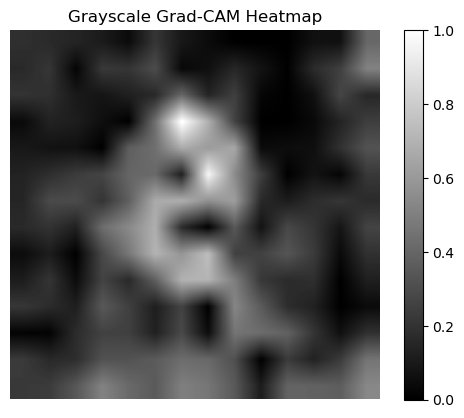

In [46]:
import torch
from pytorch_grad_cam import GradCAM
from pytorch_grad_cam.utils.model_targets import ClassifierOutputTarget

# Assuming 'model' is your ResNet152 model and 'image_tensor' is the input tensor

# Target the last layer of layer4 in ResNet152
target_layers = [model.layer3[-1]]

# Create a GradCAM object
cam = GradCAM(model=model, target_layers=target_layers)

# Define the target class (e.g., 281 for 'tabby cat' in ImageNet)
targets = [ClassifierOutputTarget(112)]

# Pass the input tensor to the GradCAM object
input_tensor = image_tensor

# Generate the Grad-CAM heatmap
# You can also pass aug_smooth=True and eigen_smooth=True to apply smoothing
grayscale_cam = cam(input_tensor=input_tensor, targets=targets)

# Since the result is batch-based, get the first image from the batch
grayscale_cam = grayscale_cam[0, :]


# Convert grayscale_cam to a numpy array and normalize to [0, 1]
grayscale_cam_np = grayscale_cam
grayscale_cam_np = (grayscale_cam_np - grayscale_cam_np.min()) / (grayscale_cam_np.max() - grayscale_cam_np.min())

# Plot the heatmap
plt.imshow(grayscale_cam_np, cmap='gray')
plt.axis('off')
plt.title('Grayscale Grad-CAM Heatmap')
plt.colorbar()
plt.show()

# Now grayscale_cam contains the grayscale heatmap for visualization
# You can further process or visualize grayscale_cam as needed
